In [16]:
from Spectrum import simuspecs, SimulatedSpectrum

import numpy as np
import scipy as sp
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [7]:
def calcstart(counts, npeak):
    """
    Generate peak position of equal distance and quite wide peak width for initial guess
    """
    return np.array([[counts.shape[0]/(npeak+1)*(i+1), counts.shape[0]/(npeak+1)/2] for i in range(npeak)]).ravel()

spec = np.ones(100)
calcstart(spec, 4)

array([20., 10., 40., 10., 60., 10., 80., 10.])

In [134]:
def gaussian(indexes, pos, sigma):
    return np.exp(-(indexes-pos)**2/(2*sigma**2))

def linear(indexes, pos, slope):
    return indexes * slope + pos

def fitgaussian(params, indexes, counts, npeaks):
    global heights
    global fcounts
    peaks = np.zeros((counts.shape[0], npeaks))
    for i in range(npeaks-1):
        peaks[:, i] = gaussian(indexes, params[i], params[npeaks-1])
    peaks[:, -1] = linear(indexes, params[-2], params[-1])
    heights = np.abs(np.abs(np.linalg.lstsq(peaks, counts)[0]))
    fcounts = peaks @ heights
    return np.linalg.norm(fcounts - counts)

In [137]:
def peakfit(indexes, counts, npeak, trials):

    global fcounts
    global heights
    # matrix representation of spectrum: Spectrum(:,1) = Height(1,n) * Shape(n,:)
    best_error = 1E3
    best_start = np.zeros((npeak, 2)) # used to store bese initila guess parameters
    best_params = np.zeros((npeak, 2))  # used to store best fit parameters
    best_counts = np.zeros(counts.shape[0])
    
    heights = np.ones(npeak)  # H=dim(n,1) matrix, to represent peak amplitude and baseline
    fcounts = np.zeros(counts.shape[0])  # used to store fitted spectrum

    # start = calcstart(counts, npeak)
    start = np.array([70, 115, 9, 10, 10])
    for i in range(trials):
        output = opt.fmin(fitgaussian, x0=start, args=(indexes, counts, npeak), disp=False)
        print("output=", output)
        params, error = output[:2]
        if error < best_error and heights.min() >0:
            best_error = error
            best_params = params
            best_start = params
            best_counts = fcounts

    return best_counts

# spec = np.asarray(simuspecs['simple'])
spec = SimulatedSpectrum(peaks_info=[[93, 5, 1000], [115, 6, 1200]], base_amplitude=20, base_intensity=10)
indexes = np.arange(len(spec))

fcounts = peakfit(indexes, spec, 3, 10)

C:\Users\alber\AppData\Local\Temp\ipykernel_13308\2005555341.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  heights = np.abs(np.abs(np.linalg.lstsq(peaks, counts)[0]))


output= [ 92.94629366 115.08659571   5.50773826  49.48961698   0.53833036]
output= [ 92.94629366 115.08659571   5.50773826  49.48961698   0.53833036]
output= [ 92.94629366 115.08659571   5.50773826  49.48961698   0.53833036]
output= [ 92.94629366 115.08659571   5.50773826  49.48961698   0.53833036]
output= [ 92.94629366 115.08659571   5.50773826  49.48961698   0.53833036]
output= [ 92.94629366 115.08659571   5.50773826  49.48961698   0.53833036]
output= [ 92.94629366 115.08659571   5.50773826  49.48961698   0.53833036]
output= [ 92.94629366 115.08659571   5.50773826  49.48961698   0.53833036]
output= [ 92.94629366 115.08659571   5.50773826  49.48961698   0.53833036]
output= [ 92.94629366 115.08659571   5.50773826  49.48961698   0.53833036]


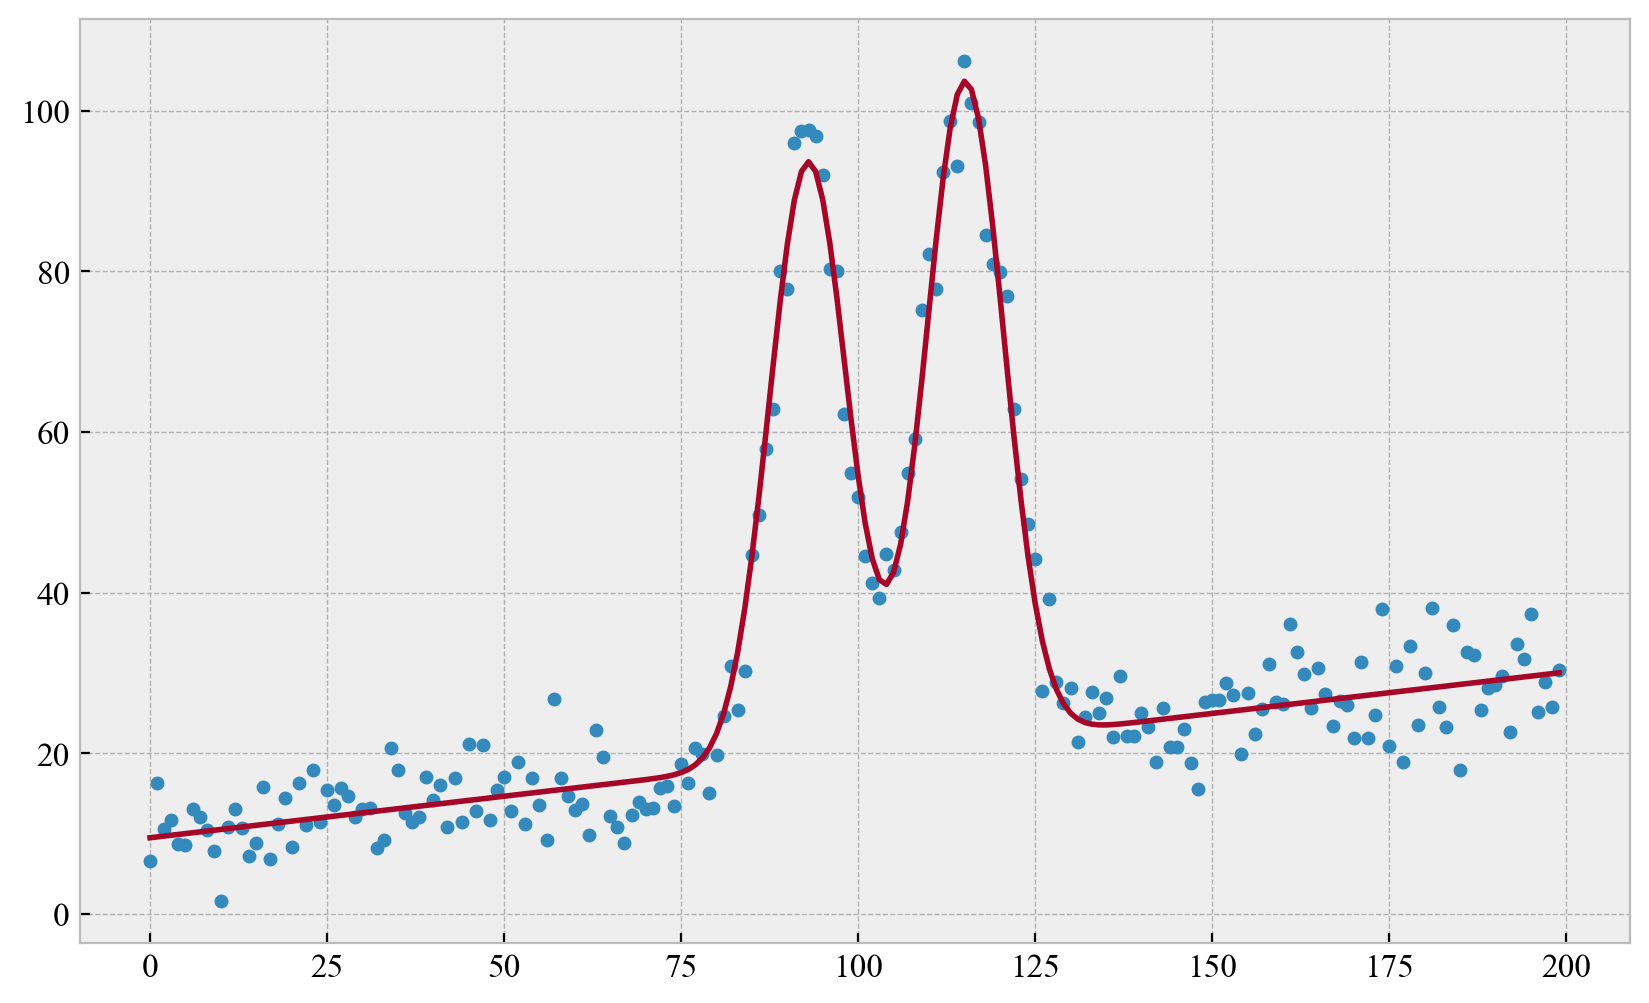

In [138]:
plt.plot(spec, 'o')
plt.plot(fcounts)

In [145]:
x = np.linspace(0, 10, 100)
y = x * 5 + 1
def func1(params):
    a, b = params
    return ((a * x + b - y)**2).sum()
def func2(params):
    a, b, c = params
    return ((a * x ** 2 + b * x + c - y)**2).sum()
opt.fmin(func1, x0=[1, 1]), opt.fmin(func2, x0=[1, 1, 1])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 67
         Function evaluations: 129
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 142
         Function evaluations: 259


(array([4.9999966 , 1.00002286]),
 array([1.26008554e-06, 4.99998291e+00, 1.00004712e+00]))